grade: 5/5
# Homework 3

See the readme for the text of the homework assignment.  

If you have not already stored the Pronto data at the same path that I have then it will be downloaded and saved one directory above the folder of this homework repository (so it does not get uploaded to github.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter
import pandas as pd
import seaborn; seaborn.set()
import zipfile
import wget
import os
from ipywidgets import interact
from IPython.html import widgets
from IPython.display import display

%matplotlib inline

def get_pronto_data():
    """Downloads the Pronto bike data unless it is already stored locally"""
    
    URL = 'https://s3.amazonaws.com/pronto-data/open_data_year_one.zip'
    filename = 'open_data_year_one.zip'
    if os.path.exists('../../Pronto_Data/%s' % (filename)):
        print 'Pronto data is saved locally'
        return
    else:
        print 'Downloading %s' % (filename)
        %mkdir '../../Pronto_Data/'
        wget.download(URL, out='../../Pronto_Data/')
        return

get_pronto_data()
zf = zipfile.ZipFile('../../Pronto_Data/open_data_year_one.zip')

Pronto data is saved locally


/Users/blake/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/blake/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# First, explore the pronto bikeshare data to choose an interesting subset

Select the filename of any csv in the downloaded data below to see what the data looks like
Warning: 2015_status_data.csv is a large file so if you click it there will be a lag

In [2]:
files = zf.namelist()
which_file = widgets.Select(options=files)

def select_file(filename):
    return pd.read_csv(zf.open(filename))
    
i = widgets.interactive(select_file, filename=which_file)
display(i)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971
5,436,10/13/2014 10:34,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1974
6,437,10/13/2014 11:35,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Annual Member,Male,1978
7,438,10/13/2014 11:35,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Annual Member,Male,1983
8,439,10/13/2014 11:35,10/13/2014 11:45,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Annual Member,Female,1974
9,440,10/13/2014 11:35,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Annual Member,Male,1958


### After exploring a bit with the above interactive dropdown, the available data appears to be as follows:

-  station_data contains the different stations, their coordinates, how many bikes are at each, and when they opened.
-  status_data appears to contain information about how many bikes and docking spots are available at each station each minute of every day.
- trip data has information on every trip, including bike ID, duration, start/stop time, start/end stations, user type, gender & birth year for annual members.
- weather_data contains weather information for each day in 98101 zip code




## Based on this exploration I would like to investigate two questions related to the birth year of annual members 
Age information is not available for short-term pass holders so they will not be included in this analysis.

- Question 1: Can I observe any correlation between rider birth year and trip duration?
- Question 2: Can I observe any correlation between rider birth year and trip start time?

For both these questions I will also look at whether the rider's gender has an impact on the answer.

In [42]:
df = pd.read_csv(zf.open('2015_trip_data.csv'), parse_dates=True)
# Remove entries from riders who are not annual members
df = df[df.usertype.str.contains('Annual')]
times = pd.DatetimeIndex(df['starttime'])
df['date'] = times.date
df['time'] = times.time

### In this interactive plot you can examine trip duration by specifying riders' birth year and gender

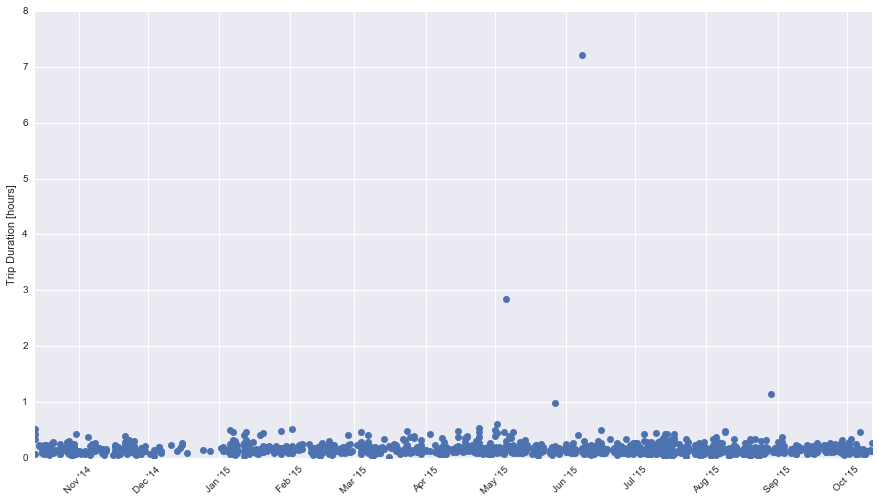

In [4]:
def plot_duration(birth_year, gender):
    df2 = df[df.birthyear==birth_year]
    df2 = df2[df2.gender==gender]
    dates = date2num(df2.date)
    dateFmt = DateFormatter("%b '%y")
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot_date(dates, df2['tripduration']/60/60)
    ax.xaxis.set_major_formatter(dateFmt)
    plt.xticks(rotation=45)
    plt.yticks(range(0, 2+int(np.max(df['tripduration']/60/60))))
    plt.ylabel('Trip Duration [hours]')
    
interact(plot_duration,
         birth_year=(int(df.birthyear.min()), int(df.birthyear.max())),
         gender=('Male', 'Female'))
    

### Another way to look at this data (noninteractively) is to plot every birth year as a different color

Looking at it this way shows the trends more clearly: 
-  The vast majority of trips are less than 1 hour, but those riders that bike for longer than one hour are nearly all born between 1960-1990.  
-  Older and younger riders take shorter trips.

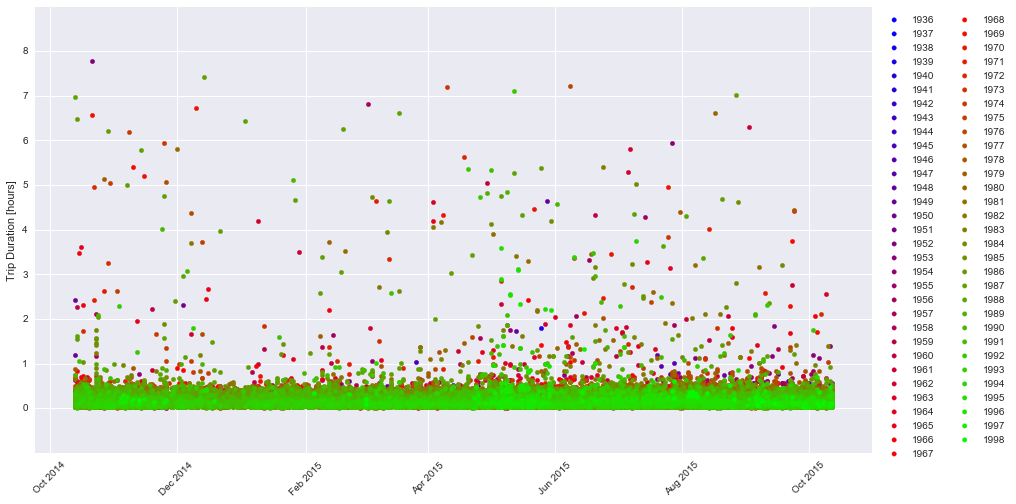

In [40]:
plt.figure(2, figsize=(15,8))
years = range(int(df.birthyear.min()), int(df.birthyear.max()))
num_colors = len(years)
color_map = plt.get_cmap('brg')

for i, birth_year in enumerate(years):
#     gender = 'Male'
    df2 = df[df.birthyear==birth_year]
#     df2 = df2[df2.gender==gender]
    color = color_map(1.*i/num_colors)
    plt.scatter([date for date in df2.date], df2['tripduration']/60/60, label=birth_year, color=color)

plt.xticks(rotation=45)
plt.yticks(range(0, 2+int(np.max(df['tripduration']/60/60))))
plt.ylabel('Trip Duration [hours]')
plt.legend(loc=0, ncol=2, bbox_to_anchor=(1.17, 1))

### Here you can examine the trip start time based on birth year and gender

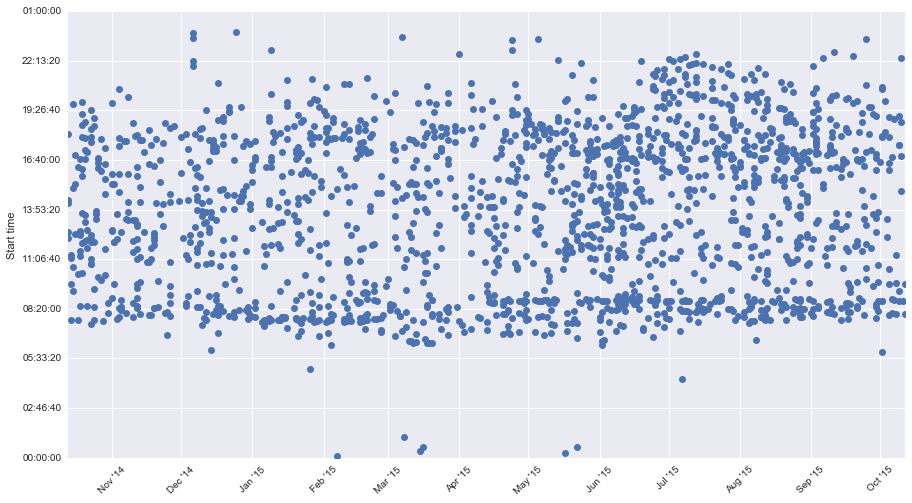

In [51]:
def plot_start(birth_year, gender):
    df2 = df[df.birthyear==birth_year]
    df2 = df2[df2.gender==gender]
    dates = date2num(df2.date)
    dateFmt = DateFormatter("%b '%y")
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot_date(dates, df2['time'])
    ax.xaxis.set_major_formatter(dateFmt)
    plt.xticks(rotation=45)
    plt.ylabel('Start time')
    
interact(plot_start,
         birth_year=(int(df.birthyear.min()), int(df.birthyear.max())),
         gender=('Male', 'Female'))

### This is another way to look at the start time by birth year and gender
In this plot the riders older than lb and younger than ub are shown as solid markers, while everyone in between is faded.

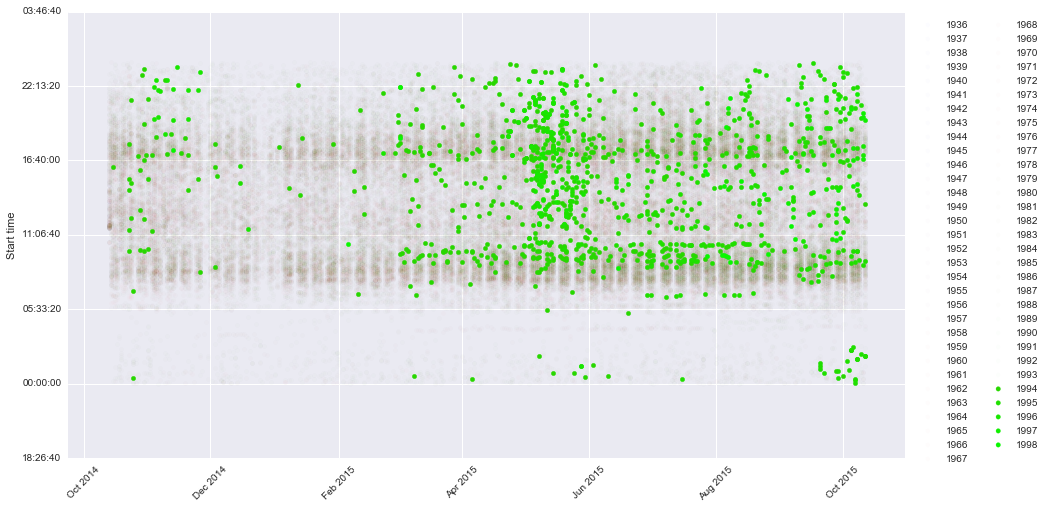

In [67]:
def plot_start_2(lb, ub):
    plt.figure(4, figsize=(15,8))
    years = range(int(df.birthyear.min()), int(df.birthyear.max()))
    num_colors = len(years)
    color_map = plt.get_cmap('brg')

    for i, birth_year in enumerate(years):
        df2 = df[df.birthyear==birth_year]
        color = color_map(1.*i/num_colors)
        if birth_year < lb:
            plt.scatter([date for date in df2.date], [time for time in df2.time],
                        label=birth_year, color=color)
        elif birth_year < ub:
            plt.scatter([date for date in df2.date], [time for time in df2.time],
                label=birth_year, color=color, alpha=0.01)
        else:
            plt.scatter([date for date in df2.date], [time for time in df2.time],
                        label=birth_year, color=color)            

    plt.xticks(rotation=45)
    plt.ylabel('Start time')
    plt.legend(loc=0, ncol=2, bbox_to_anchor=(1.17, 1))

interact(plot_start_2,
         lb=(int(df.birthyear.min()), int(df.birthyear.max())),
         ub=(int(df.birthyear.min()), int(df.birthyear.max())))

#### Based on the above interactive charts it looks like most rides for annual members take place during commuting hours (8am, 5pm).  However, there are some things we can tell about the age of these 9-5 commuters:
-  Riders born before 1962 use the service evenly during all daylight hours (they are not 9-5 commuters)
-  Most riders starting their journey after midnight are born after 1985.
-  Riders born in 1994 and later are also not 9-5 commuters and ride during all hours, but generally don't ride during the winter (Dec-Feb).

# Use of iPython features:

In making this notebook I used some ipython magic (%mkdir and %matplotlib inline) to interact with my filesystem and make plotting more convenient.  While it is not visible in the final notebook, I made extensive use of tab completion and help functionality (through both shift+tab and ? magic) for almost every part of the notebook to learn the appropriate commands and syntax.  I use the iPython keyboard shortcuts to create and delete cells, move between cells, change them to or from markdown, etc so that I don't need to bother with the mouse.  The interactive plots are useful for exploring some data, however using the sliders to select things like birth year can slow things down because if you slide from 1974 to 1956 the iPython notebook computes (and plots) the data for every year in between those years instead of jumping directly from one to the other (and thus it takes a long time to cycle through all the plots until reaching the year I selected).  Perhaps a dropdown list would solve this problem and be worth exploring in the future.

